For this set of experiments the copy number threshold was variable across genes.
This code either asks to specify copy number threshold for each gene, or in some places imports a spreadsheet with those values

In many places the code is designed to subset first all cells expressing a "cannonical marker" i.e. Th, Gad, or Vglut2.
Because we sometimes want cells expressing either Gad1 or Gad2, you can usually specify a "cannon" gene and a "cannon_or" gene, and the code will pull cells expressing either gene.

### loading libraries and defining functions

In [1]:
library(ggplot2)
library(xlsx)
library(eulerr)
library(dplyr)
library(scales)

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'xlsx' was built under R version 4.1.3"
Warning message:
"package 'eulerr' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'scales' was built under R version 4.1.3"


### defining a series of functions that will be used to pull out positive cells and make Euler plots

In [2]:
#Define a function for subsetting cells positive for a gene
#copynum is minimum copies for a cell to be considered positive; default is 3

pos_cells <- function(data, gene, copynum = 3){

    data[ data[paste0(gene,".Copies")] >= copynum, ]
    
}

#Define a function for subsetting cells negative for a gene
#copynum is minimum copies for a cell to be considered positive; default is 3

neg_cells <- function(data, gene, copynum = 3){

    data[ data[paste0(gene,".Copies")] < copynum, ]
}

#Define a function, posOR_cells for subsetting cells positive for either of two genes
#copynum is minimum copies for a cell to be considered positive; default is 3

posOR_cells <- function(data, gene1, gene2, copynum1 = 3, copynum2 = 3){

    data[ (data[paste0(gene1,".Copies")] >= copynum1) | (data[paste0(gene2,".Copies")] >= copynum2), ]
}

In [3]:
#Define a function for subsetting cells to be used in Euler plot calculations, for 3 genes
#outputs the number of cells
#This function is used as a subfunction in 'euler_values'

euler_cells <- function(data, gene1, gene2, gene3, copynum1=3, copynum2=3, copynum3=3, 
                        gene1posneg, gene2posneg, gene3posneg){
    
    if(gene1posneg=='pos'){
        sub1<-data[ data[paste0(gene1,".Copies")] >= copynum1, ]
        } else {
            sub1<-data[ data[paste0(gene1,".Copies")] < copynum1, ]
            }
    
    if(gene2posneg=='pos'){
        sub2<-sub1[ sub1[paste0(gene2,".Copies")] >= copynum2, ]
        } else {
            sub2<-sub1[ sub1[paste0(gene2,".Copies")] < copynum2, ]
            }
    
    if(gene3posneg=='pos'){
        sub3<-sub2[ sub2[paste0(gene3,".Copies")] >= copynum3, ]
        } else {
            sub3<-sub2[ sub2[paste0(gene3,".Copies")] < copynum3, ]
            }
    nrow(sub3)
}

In [4]:
#Define a function for tabulating values for Euler plots, for 3 genes
#Generates a list of number of cells in each category

euler_values<-function(data){
Acells <- euler_cells(data, sub_gene1, sub_gene2, sub_gene3,  
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3],
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='neg')
Bcells <- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3],
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='neg')
Ccells <- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3],
                        gene1posneg='neg', gene2posneg='neg', gene3posneg='pos') 
ABcells<- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3],
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='neg') 
ACcells<- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3],
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='pos') 
BCcells<- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3],
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='pos') 
ABCcells<- euler_cells(data, sub_gene1, sub_gene2, sub_gene3, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3],
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='pos') 
    
c(Acells, Bcells, Ccells, ABcells, ACcells, BCcells, ABCcells)
}

In [5]:
#Define a function for subsetting cells to be used in Euler plot calculations, for 2 genes
#outputs the number of cells
#This function is used as a subfunction in 'euler_values'

euler_cells2 <- function(data, gene1, gene2, copynum1=3, copynum2=3, 
                        gene1posneg, gene2posneg){
    
    if(gene1posneg=='pos'){
        sub1<-data[ data[paste0(gene1,".Copies")] >= copynum1, ]
        } else {
            sub1<-data[ data[paste0(gene1,".Copies")] < copynum1, ]
            }
    
    if(gene2posneg=='pos'){
        sub2<-sub1[ sub1[paste0(gene2,".Copies")] >= copynum2, ]
        } else {
            sub2<-sub1[ sub1[paste0(gene2,".Copies")] < copynum2, ]
            }
    
    nrow(sub2)
}

In [6]:
#Define a function for tabulating values for Euler plots, for 2 genes
#Generates a list of number of cells in each category

euler_values2<-function(data){
Acells <- euler_cells2(data, sub_gene1, sub_gene2,  
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2],
                        gene1posneg='pos', gene2posneg='neg')
Bcells <- euler_cells2(data, sub_gene1, sub_gene2, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2],
                        gene1posneg='neg', gene2posneg='pos')

ABcells<- euler_cells2(data, sub_gene1, sub_gene2, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], 
                        gene1posneg='pos', gene2posneg='pos') 

    
c(Acells, Bcells, ABcells)
}

In [7]:
#Define a function for subsetting cells to be used in Euler plot calculations, for 4 genes
#outputs the number of cells
#This function is used as a subfunction in 'euler_values'

euler_cells4 <- function(data, gene1, gene2, gene3, gene4, copynum1=3, copynum2=3, copynum3=3, copynum4=3, 
                        gene1posneg, gene2posneg, gene3posneg, gene4posneg){
    
    if(gene1posneg=='pos'){
        sub1<-data[ data[paste0(gene1,".Copies")] >= copynum1, ]
        } else {
            sub1<-data[ data[paste0(gene1,".Copies")] < copynum1, ]
            }
    
    if(gene2posneg=='pos'){
        sub2<-sub1[ sub1[paste0(gene2,".Copies")] >= copynum2, ]
        } else {
            sub2<-sub1[ sub1[paste0(gene2,".Copies")] < copynum2, ]
            }
    
    if(gene3posneg=='pos'){
        sub3<-sub2[ sub2[paste0(gene3,".Copies")] >= copynum3, ]
        } else {
            sub3<-sub2[ sub2[paste0(gene3,".Copies")] < copynum3, ]
            }
    
    if(gene4posneg=='pos'){
        sub4<-sub3[ sub3[paste0(gene4,".Copies")] >= copynum4, ]
        } else {
            sub4<-sub3[ sub3[paste0(gene4,".Copies")] < copynum4, ]
            }
    
    nrow(sub4)
}

In [8]:
#Define a function for tabulating values for Euler plots, for 4 genes
#Generates a list of number of cells in each category

euler_values4<-function(data){
Acells <- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='neg', gene4posneg='neg')
Bcells <- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='neg', gene4posneg='neg')
Ccells <- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='neg', gene2posneg='neg', gene3posneg='pos', gene4posneg='neg') 
Dcells <- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='neg', gene2posneg='neg', gene3posneg='neg', gene4posneg='pos') 
    
ABcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='neg',  gene4posneg='neg') 
ACcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='pos', gene4posneg='neg') 
ADcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                        copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='neg', gene4posneg='pos') 
    
BCcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3,sub_gene4, 
                       copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='pos', gene4posneg='neg') 
BDcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3,sub_gene4, 
                       copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='neg', gene4posneg='pos') 

CDcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3,sub_gene4, 
                       copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='neg', gene2posneg='neg', gene3posneg='pos', gene4posneg='pos') 
    
    
ABCcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                       copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='pos', gene4posneg='neg') 
ABDcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                       copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='neg', gene4posneg='pos') 
ACDcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                       copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='pos', gene2posneg='neg', gene3posneg='pos', gene4posneg='pos') 
BCDcells<- euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                       copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='neg', gene2posneg='pos', gene3posneg='pos', gene4posneg='pos') 

ABCDcells<-euler_cells4(data, sub_gene1, sub_gene2, sub_gene3, sub_gene4, 
                       copynum1=cpynmbrs[mouse,sub_gene1], copynum2=cpynmbrs[mouse,sub_gene2], copynum3=cpynmbrs[mouse,sub_gene3], copynum4=cpynmbrs[mouse,sub_gene4],
                        gene1posneg='pos', gene2posneg='pos', gene3posneg='pos', gene4posneg='pos') 

    
c(Acells, Bcells, Ccells, Dcells, ABcells, ACcells, ADcells, BCcells, BDcells, CDcells, 
  ABCcells, ABDcells, ACDcells, BCDcells, ABCDcells)
}

### importing data

In [9]:
#enter list of mouse IDs. Data should be organized as 1 folder per mouse, containing 1 csv per section for each mouse

mouseIDs <- c('F1','F3','M2','M3')

In [10]:
#Import data files into dataframes. Change filepath to match directory containing mouse folders 
#imported files will have name format like: F1_1data
#also generates a combined data frame called all_data

filepath <-"./"

all_data <- data.frame()

for(mouse in mouseIDs) {
    file_list <- list.files(path = paste0(filepath, mouse), 
               pattern = mouse)
    
    sectionnumber <- 1
    
    for(section in file_list) {
        data <- assign(paste0(mouse, "_", sectionnumber, "data"), 
               read.csv(paste0(filepath, mouse, '/', section)))
        
        all_data <- rbind(all_data, data)
        
        sectionnumber <- sectionnumber + 1
    } 
    
}

In [11]:
#Optional
#remove cells that express all genes (which are actually just junk)

all_data<-all_data[!(all_data$Adamts2==1 & all_data$Adcyap1==1 & all_data$Cbln4==1 & all_data$Cdh23==1 & all_data$Crhbp==1 & all_data$Gad1==1 & all_data$Gad2==1 & all_data$Glra2==1 & all_data$Ndnf==1 & all_data$Pnoc==1 & all_data$Sema3c==1 & all_data$Sema5b==1 & all_data$Slc17a6==1 & all_data$Slit2==1 & all_data$Th==1),]


### Making plots

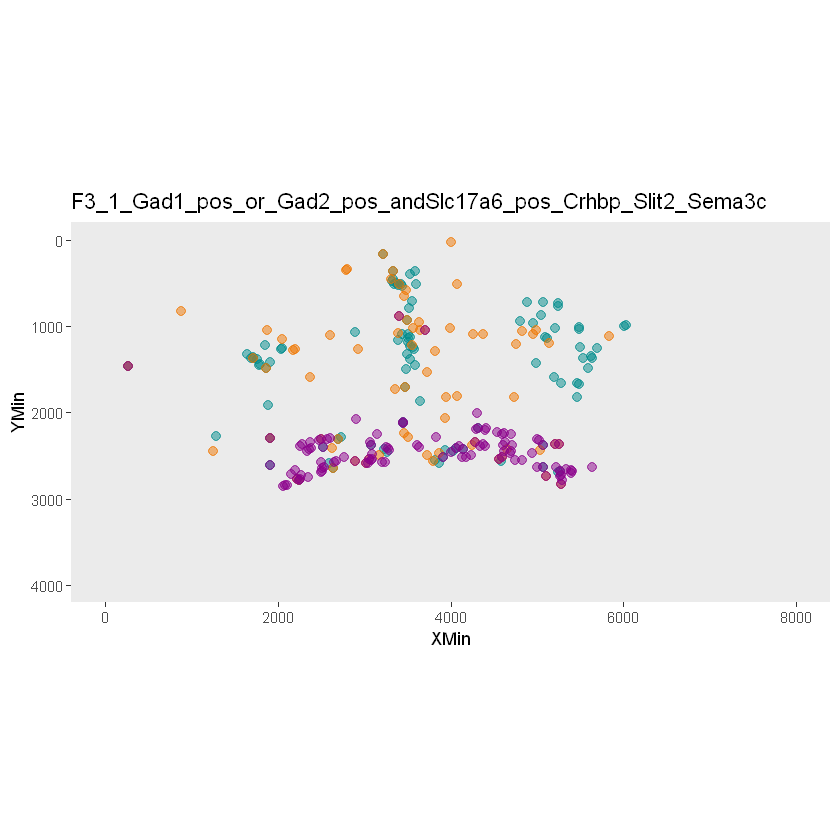

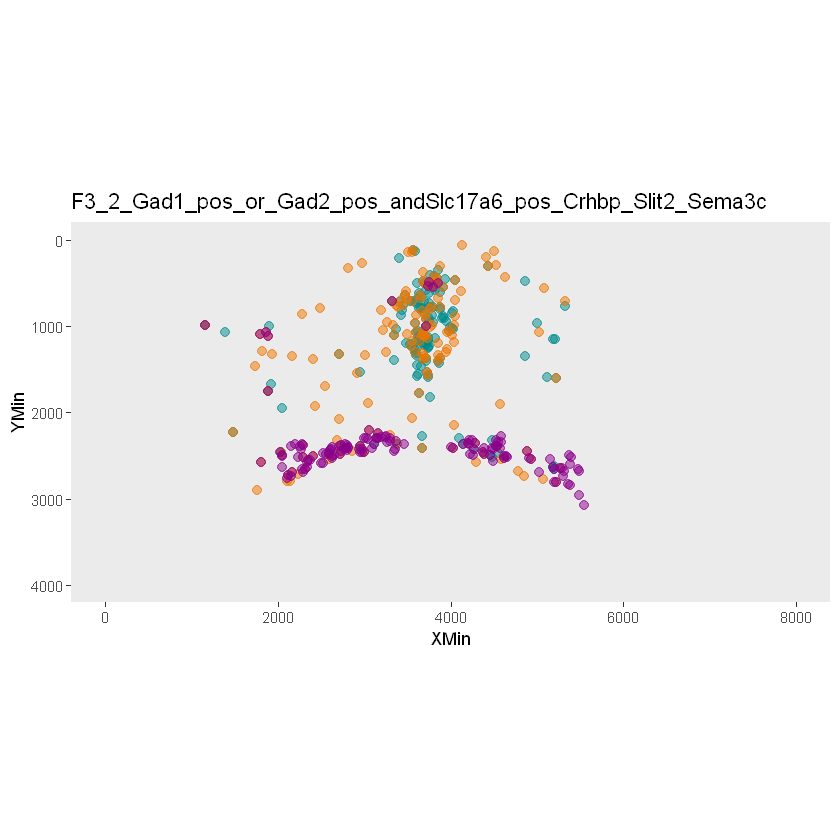

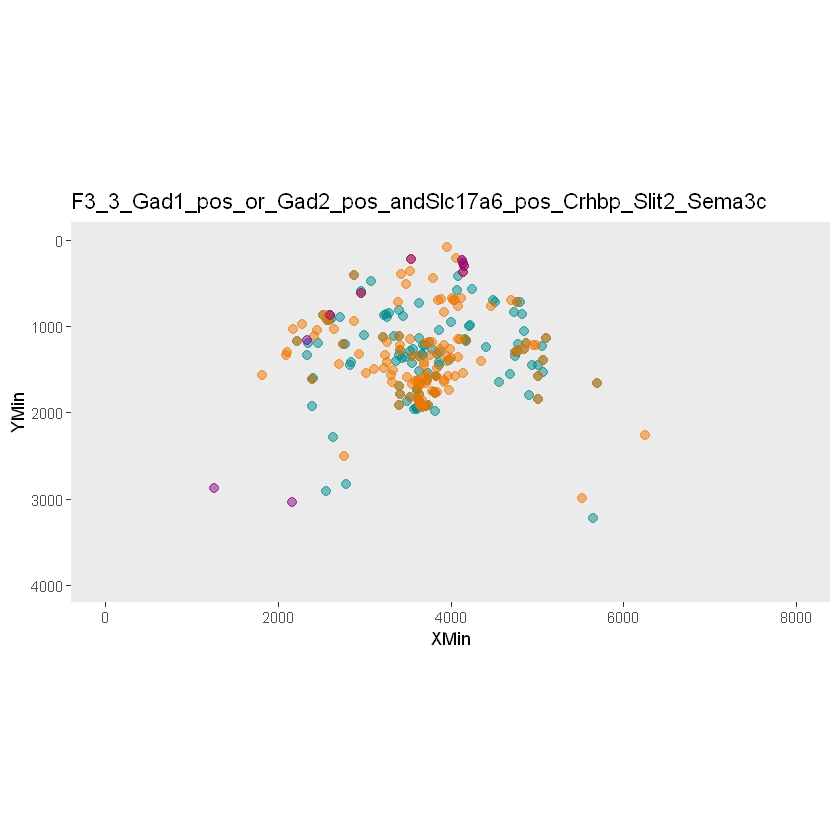

Warning message:
"Removed 2 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


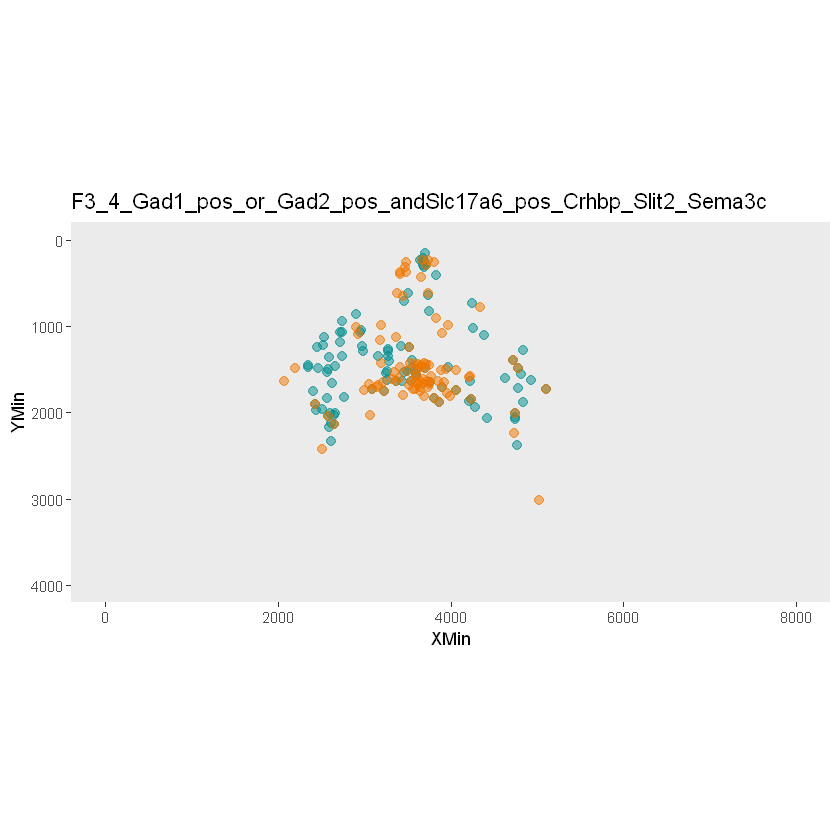

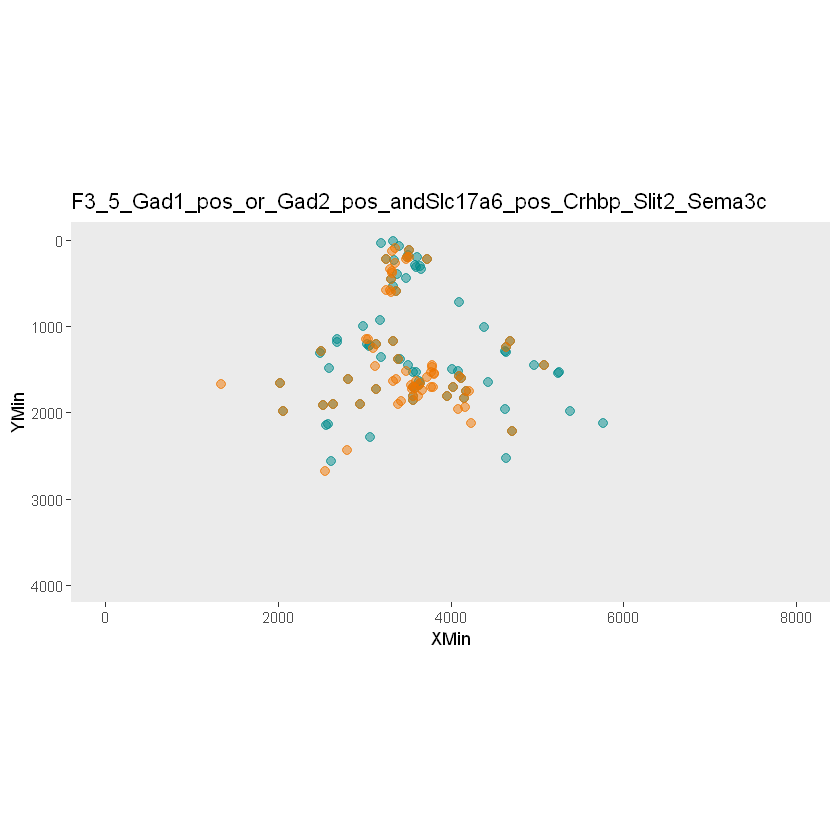

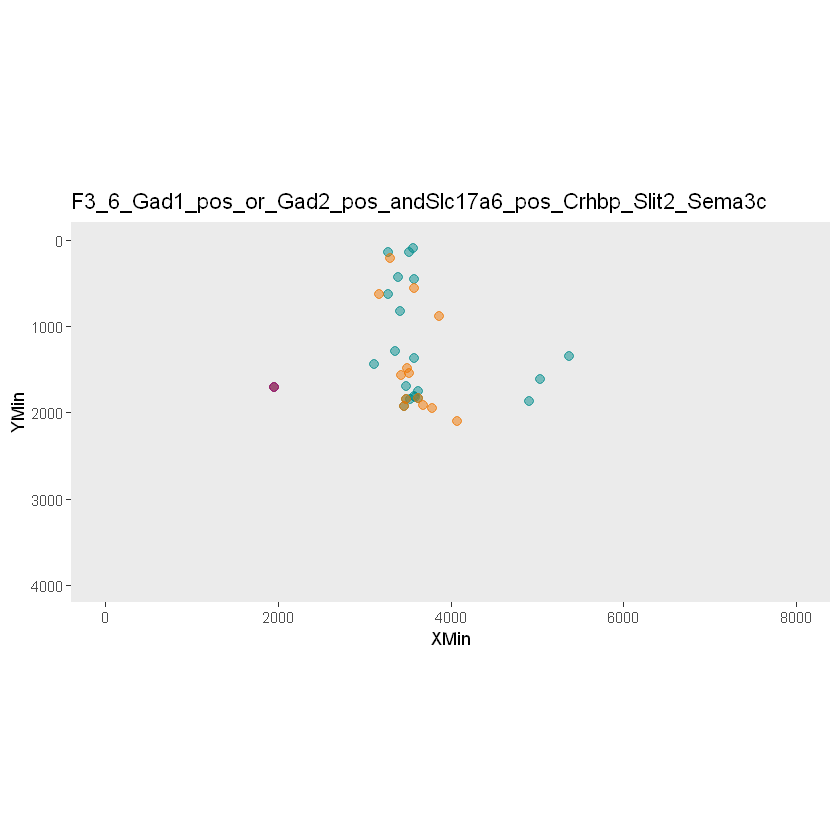

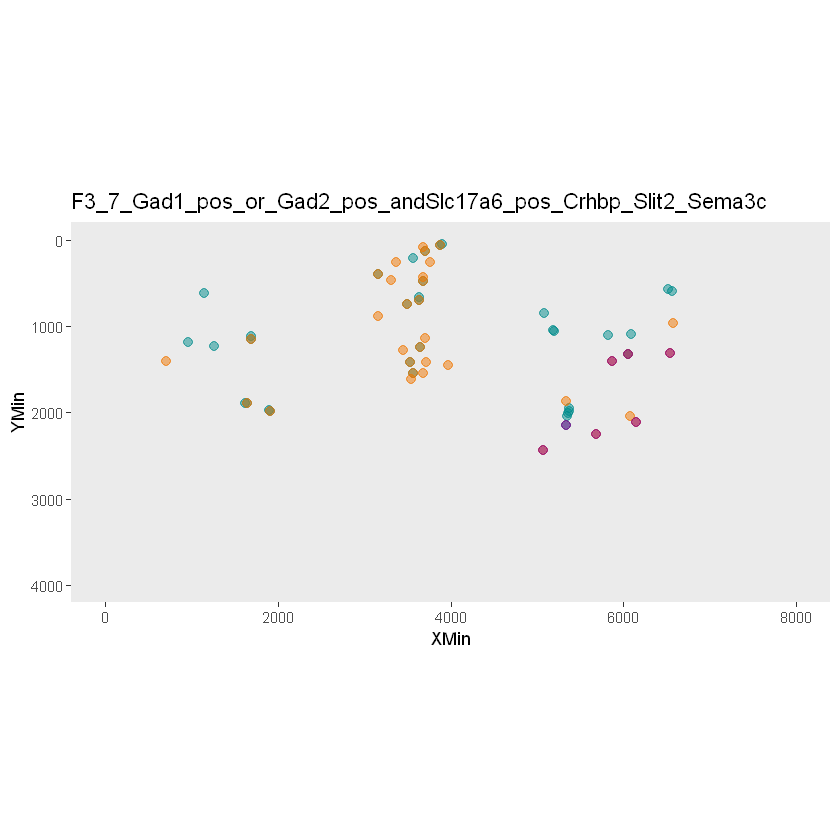

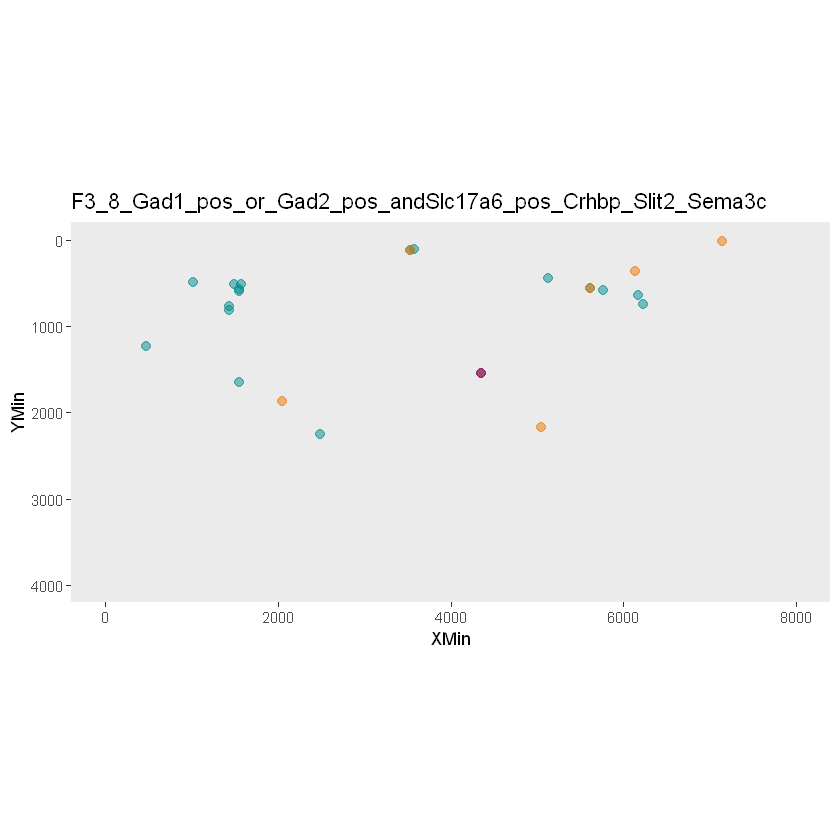

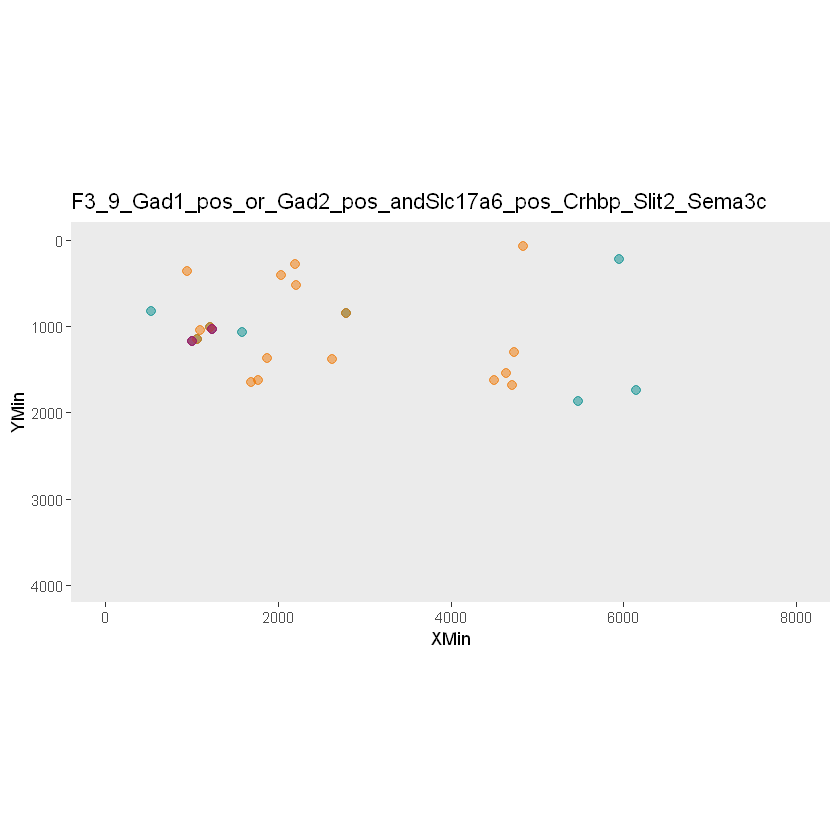

In [12]:
#Use this block of code to subset by a cannonical marker, then plot up to 3 genes expressing that marker

#Makes a plot for each section from an identified mouse
#Set cannon_OR_gene to a gene name if cells can be positive for either cannonical gene (i.e Gad1 or Gad2)
#set cannon_OR_gene to 'none' if only one cannonical gene.
#Use copynum variables to set copy number threshold for each gene
#set subgenes to 'none' if you want to do fewer than 3 subgenes (or none at all). If no subgene 1, will not plot 2 or 3.

#This example plotting cells expressing Gad1 or Gad2 AND Slc17a6 (i.e. CoEx neurons)
mouse <- 'F3'
num_sections <- 9
cannon_gene <- 'Gad1'
cannon_OR_gene <- 'Gad2'
cannon_AND_gene <-'Slc17a6'
sub_gene1 <- 'Crhbp'
sub_gene2 <- 'Slit2'
sub_gene3 <- 'Sema3c'
copynumcan <- 5
copynumcanOR <- 7
copynumcanAND<-5
copynum1 <- 4
copynum2 <- 3
copynum3 <- 3
color1 <- 'darkcyan'
color2 <- 'darkorange2'
color3 <- 'darkmagenta'
filepath <- './Spatial Plots/'


mouseonly <- all_data[grep(mouse, all_data$ï..Image.File.Name), ]
sectionnumber <- 1

for(section in c(1:num_sections)) {
    seconly <- mouseonly[grep(paste0('Tilescan', section), mouseonly$ï..Image.File.Name), ]
        
    if(cannon_OR_gene=='none') {
        secname <- paste0(mouse, '_', sectionnumber, '_', cannon_gene, '_pos_', sub_gene1, '_', sub_gene2, '_', sub_gene3)
        cannon_cells <- pos_cells(data=seconly, gene=cannon_gene, copynum=copynumcan)               
                } else {
                    secname <- paste0(mouse, '_', sectionnumber, '_', cannon_gene, '_or_', cannon_OR_gene, 
                                              '_pos_', sub_gene1, '_', sub_gene2, '_', sub_gene3)
                    cannon_cells <-posOR_cells(data=seconly, gene1=cannon_gene, gene2=cannon_OR_gene, copynum1=copynumcan,
                                              copynum2=copynumcanOR)
                    }
    if(cannon_AND_gene!='none'){
        secname<-paste0(mouse, '_', sectionnumber, '_', cannon_gene, '_pos_or_', cannon_OR_gene, '_pos_and',
                        cannon_AND_gene, '_pos_', sub_gene1, '_', sub_gene2, '_', sub_gene3)
        cannon_cells <- pos_cells(data=cannon_cells, gene=cannon_AND_gene, copynum=copynumcanAND)
            }
    
            if(sub_gene1!='none') {
                sub_cells1 <- pos_cells(data=cannon_cells, gene=sub_gene1, copynum=copynum1)
                } else{
                sub_cells1 <- cannon_cells
                }

            if(sub_gene2!='none') {
                sub_cells2 <- pos_cells(data=cannon_cells, gene=sub_gene2, copynum=copynum2)
                }            

            if(sub_gene3!='none') {
                sub_cells3 <- pos_cells(data=cannon_cells, gene=sub_gene3, copynum=copynum3)
                }      
            
            if(sub_gene1=='none'|sub_gene2=='none') {
                print(ggplot () + 
                geom_point(data=sub_cells1, aes(x=XMin, y=YMin),color=toString(color1),alpha=I(0.5), size=2.5, stroke=0.5) +
                theme(legend.position ='bottom', panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
                xlim(0,8000) + ylim(4000,0) + coord_fixed() +
                ggtitle(secname))
                } else if(sub_gene3=='none') {
                    print(ggplot () +
                    geom_point(data=sub_cells1, aes(x=XMin, y=YMin),color=toString(color1),alpha=I(0.5), size=2.5, stroke=0.5) +
                    geom_point(data=sub_cells2, aes(x=XMin, y=YMin),color=toString(color2),alpha=I(0.5), size=2.5, stroke=0.5) +
                    theme(legend.position ='bottom', panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
                    xlim(0,8000) + ylim(4000,0) + coord_fixed() +
                    ggtitle(secname))
                    } else {
                        print(ggplot () +
                        geom_point(data=sub_cells1, aes(x=XMin, y=YMin),color=toString(color1),alpha=I(0.5), size=2.5, stroke=0.5) +
                        geom_point(data=sub_cells2, aes(x=XMin, y=YMin),color=toString(color2),alpha=I(0.5), size=2.5, stroke=0.5) +
                        geom_point(data=sub_cells3, aes(x=XMin, y=YMin),color=toString(color3),alpha=I(0.5), size=2.5, stroke=0.5) +
                        theme(legend.position ='bottom', panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
                        xlim(0,8000) + ylim(4000,0) + coord_fixed() +
                        ggtitle(secname))
                        }
 #               ggsave(file=paste0(filepath, secname, '.pdf'), width=8,height=4)
            
    sectionnumber <- sectionnumber + 1

}

### plot one gene with shading based on intensity

In [13]:
#define a function to normalize cell intensity data
#The purpose of this is to exclude super bright outliers
#x=data to be normalized, normfactor=max percentile for normalization, default = 95

normalize <- function(x, normfactor=0.95){
 (x-min(x)) / ((quantile(x, c(normfactor)))-min(x))
    }

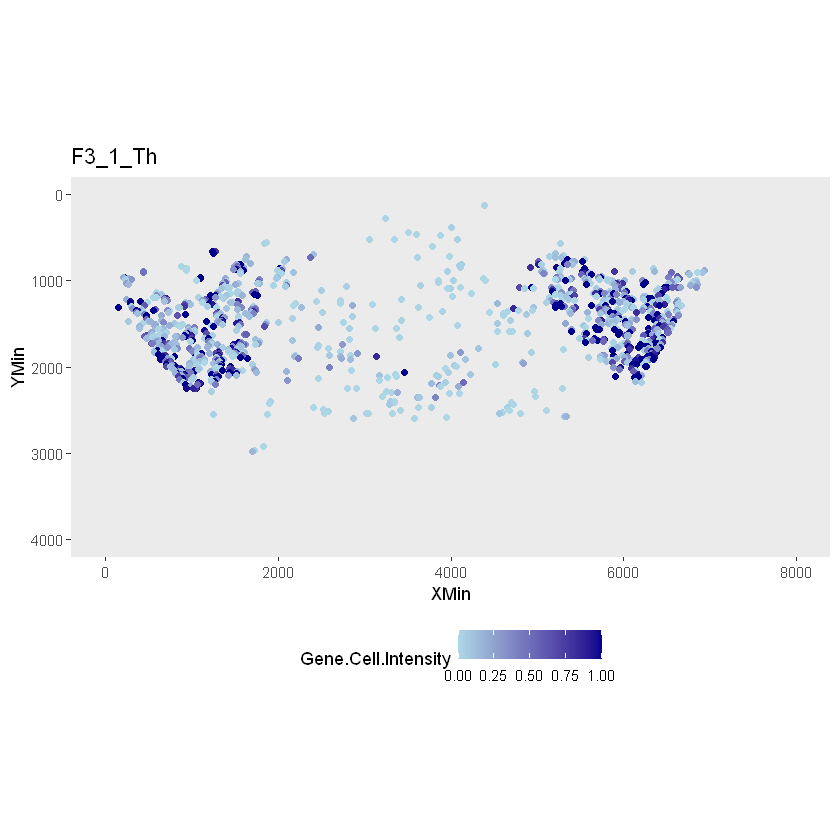

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


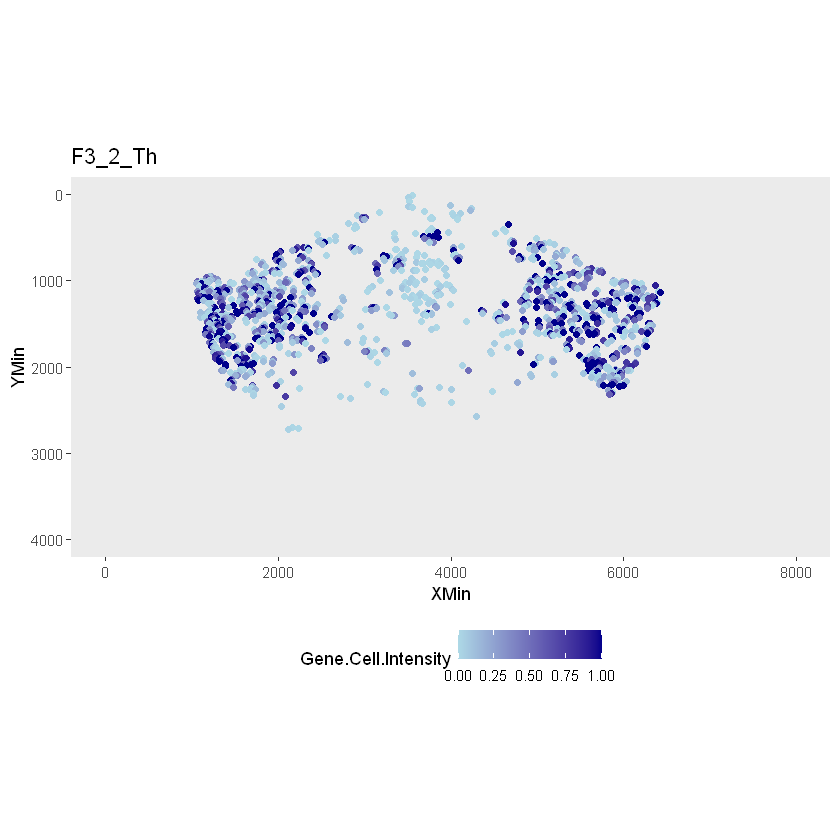

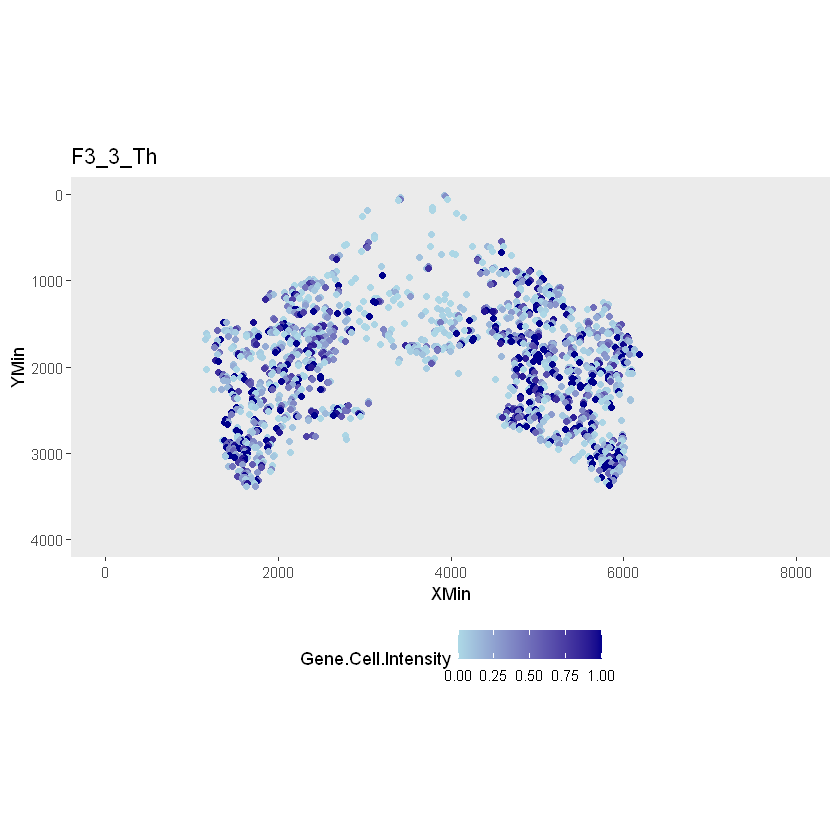

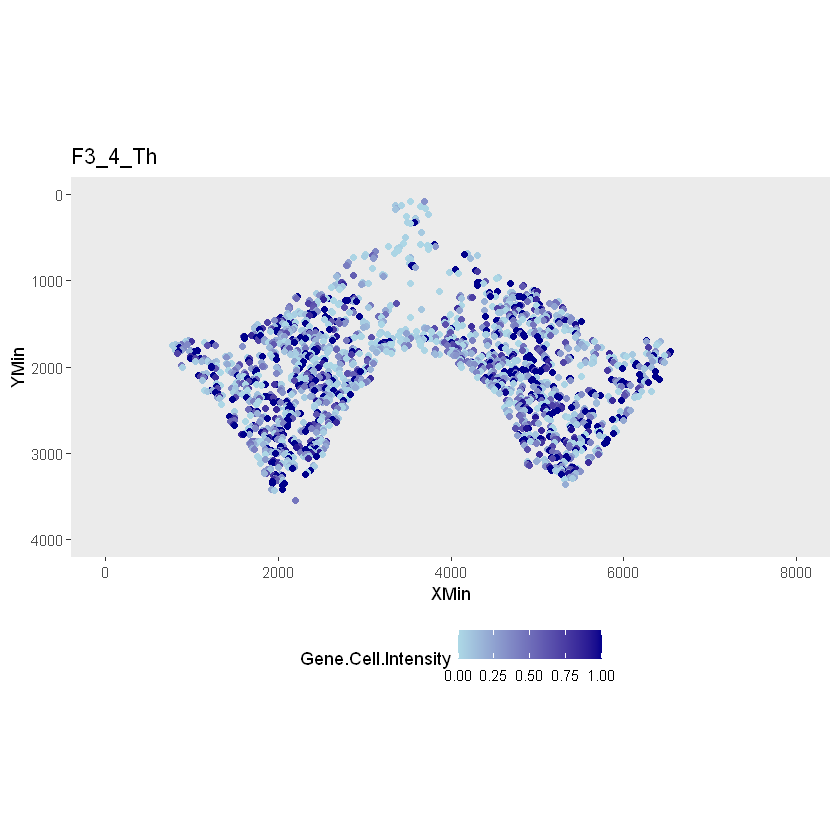

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


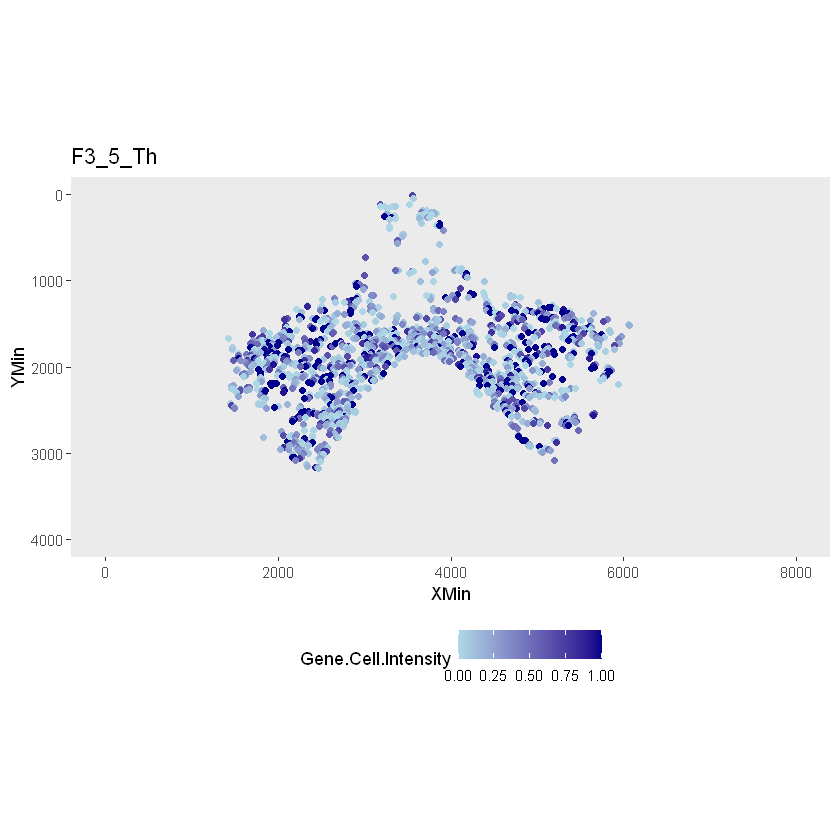

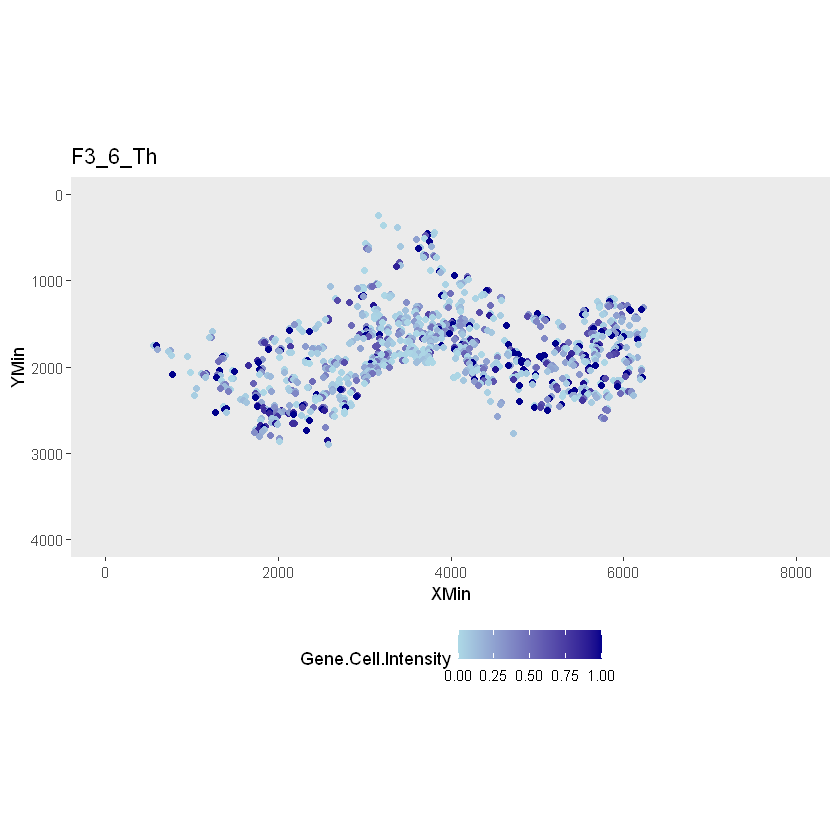

Warning message:
"Removed 8 rows containing missing values (`geom_point()`)."


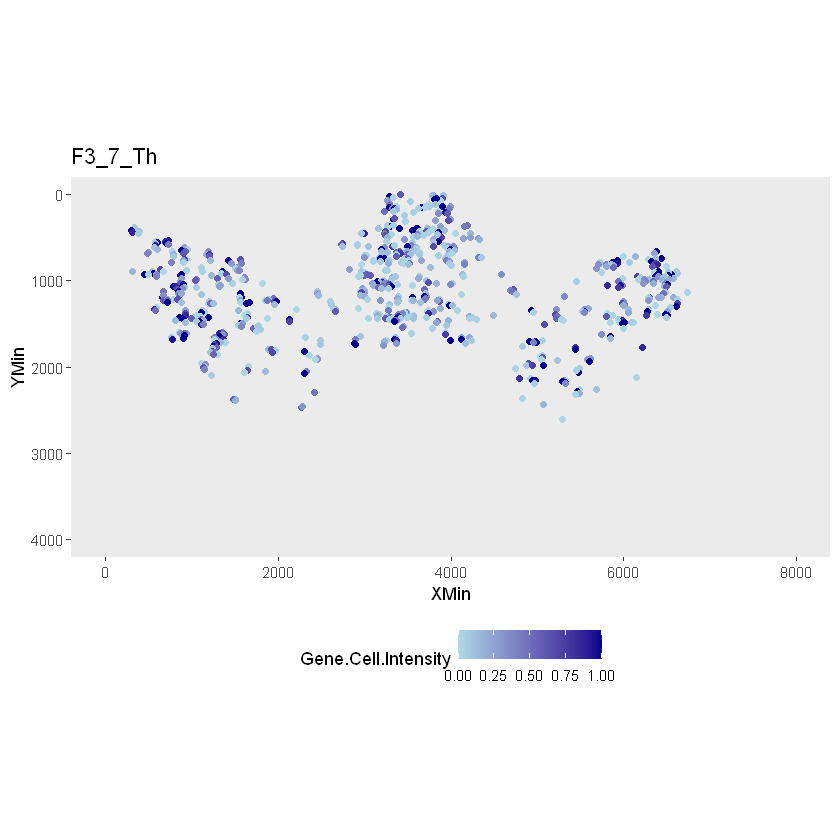

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


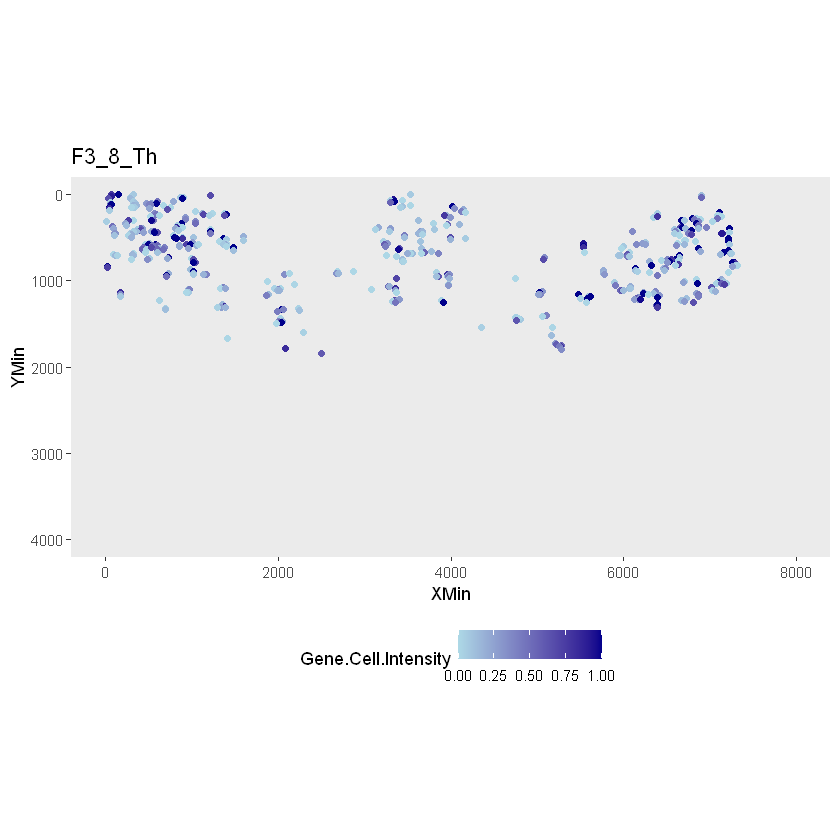

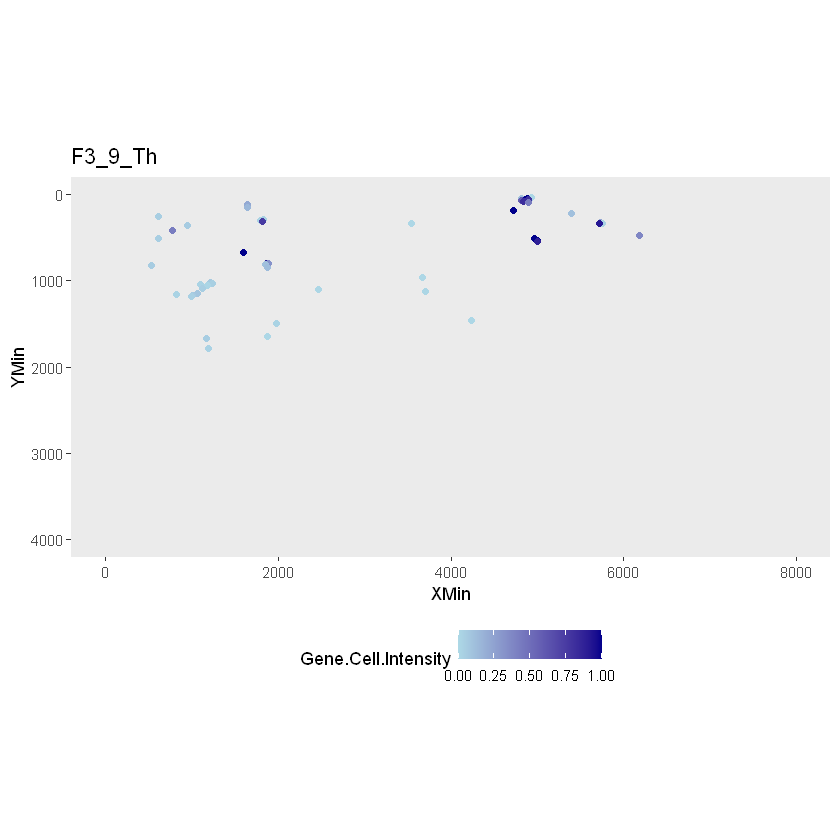

In [14]:
#Plot a single gene across all sections for one animal, using 'Cell Intensity' to shade dots.
#Adjust normfactor for normalization of cell intensities to indicated percentile to exclude outliers

mouse <- 'F3'
num_sections <- 9
gene <- 'Th'
copynum <- 3
normfactor <- 0.95
filepath <- './Spatial Plots/'

norm_data<-all_data
norm_data['Gene.Cell.Intensity']<- lapply(norm_data[paste0(gene, '.Cell.Intensity')], normalize, normfactor=normfactor)

mouseonly <- norm_data[grep(mouse, norm_data$ï..Image.File.Name), ]

sectionnumber <- 1

for(section in c(1:num_sections)) {
    seconly <- mouseonly[grep(paste0('Tilescan', section), mouseonly$ï..Image.File.Name), ]
    secname <- paste0(mouse, '_', sectionnumber, '_', gene)
    cells <- pos_cells(data=seconly, gene=gene, copynum=copynum)
    
     print(ggplot (cells, aes(x=XMin, y=YMin, color=Gene.Cell.Intensity)) + 
        geom_point() +
        theme(legend.position ='bottom', panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
        xlim(0,8000) + ylim(4000,0) + coord_fixed() +
        scale_colour_gradient(low = "lightblue", high = "darkblue", limits=c(0, 1),oob = scales::squish) +
        ggtitle(secname))

 #       ggsave(file=paste0(filepath, secname, '_intensity.pdf'), width=8,height=4)
            
        sectionnumber <- sectionnumber + 1

}


# Rostral-Caudal cell counts

In [15]:
#import file with copy number thresholds

cpynmbrs <- read.xlsx('./copy number thresholds.xlsx', 'Sheet1', row.names = 1, header= TRUE)

In [16]:
#get counts for all genes for all sections 
#Output as an excel file
#Can pre-subset by a cannonical gene first, or input "none" to count all cells.

num_sections <- 9
pre_subset_gene <- 'none'
filepath <- './Rostral-Caudal Counts/'
genelist<-c("Adamts2","Adcyap1","Cbln4","Cdh23","Crhbp","Gad1","Gad2","Glra2","Ndnf","Pnoc","Sema3c","Sema5b","Slc17a6","Slit2","Th")

for(mouse in mouseIDs) {
    mouseonly <- all_data[grep(mouse, all_data$ï..Image.File.Name), ]
    output <- data.frame(matrix(ncol = length(genelist), nrow = num_sections))
    colnames(output) <-genelist
    
    if(pre_subset_gene!='none') {
        mouseonly <- pos_cells(data=mouseonly, gene=pre_subset_gene, copynum=cpynmbrs[mouse,pre_subset_gene])
            }

    for(section in c(1:num_sections)) {
        seconly <- mouseonly[grep(paste0('Tilescan', section), mouseonly$ï..Image.File.Name), ]           
        seccounts <- c()
        
        for(gene in genelist) {
        sub_cells <- pos_cells(data=seconly, gene=gene, copynum=cpynmbrs[mouse,gene])
        count <- nrow(sub_cells)
        seccounts <- append(seccounts, count)
        }
        
    output[section,]<-seccounts
    }
 #   write.xlsx2(output,file=paste0(filepath, mouse, "_counts.xlsx"))
}

# Medial-lateral histograms

In [17]:
#import file with copy number thresholds

cpynmbrs <- read.xlsx('./copy number thresholds.xlsx', 'Sheet1', row.names = 1, header= TRUE)

In [18]:
#define a function, 'middle', that finds the middle of each section

middle<-function(data){
    mean(c(min(data$XMin), max(data$XMin)))
}

In [19]:
#find middle of each section
#generates a vector ('all_midpoints_vec') defining midpoint for each cell and adds this as a column to all_data to make 'adj_data'
#then subtracts that column from XMin to get adjusted X values


num_sections <- 9

midpoints_vec<-c()

for(mouse in mouseIDs) {
    mouseonly <- all_data[grep(mouse, all_data$ï..Image.File.Name), ]

    midpoints <- c()
    for(section in c(1:num_sections)) {
        seconly <- mouseonly[grep(paste0('Tilescan', section), mouseonly$ï..Image.File.Name), ]           
        vec<-rep(middle(seconly), each=nrow(seconly))
        midpoints_vec<-c(midpoints_vec, vec)   
    }
}

adj_data <- cbind(all_data, midpoints_vec)

adj_data <- adj_data %>%
  mutate(XMinAdj = XMin-midpoints_vec)

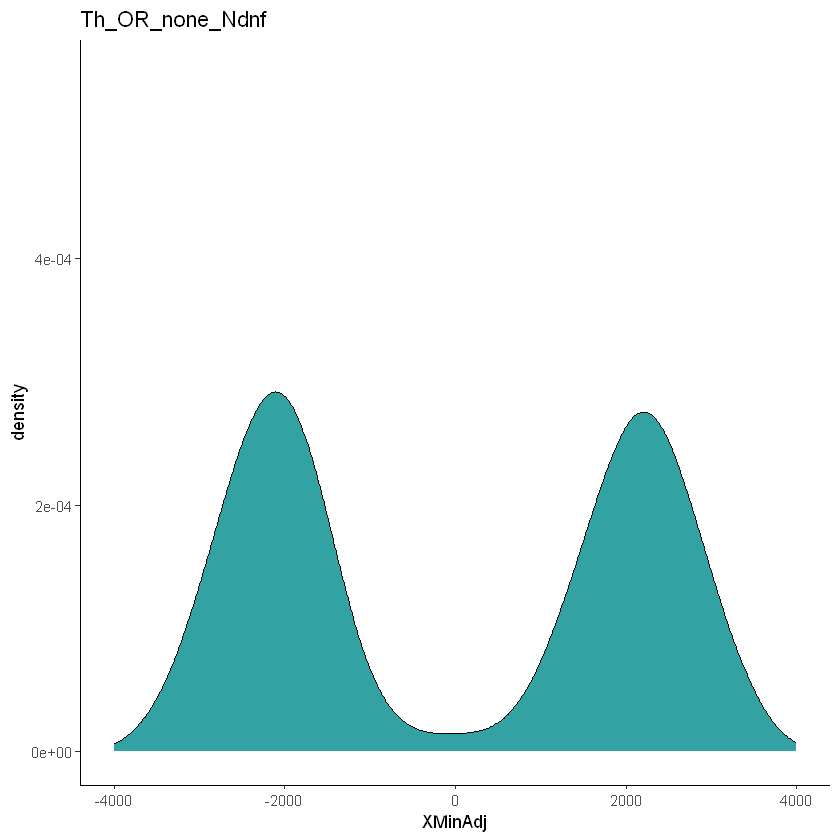

In [20]:
#Generates binned and smoothed histograms collapsed across all mice for all sections. 
#Enter 'none' in sub_gene if you only want to plot a single gene

cannon_gene <- 'Th'
cannon_OR_gene <- 'none'
cannon_AND_gene <- 'none'
sub_gene <- 'Ndnf'
color <- 'darkcyan'
filepath <- './ML Histograms/'



all_sub_cells<-data.frame()

for(mouse in mouseIDs){
    mouseonly <- adj_data[grep(mouse, adj_data$ï..Image.File.Name), ]
   
    if(cannon_OR_gene=='none') {    
        cannon_cells <- pos_cells(data=mouseonly, gene=cannon_gene, copynum=cpynmbrs[mouse, cannon_gene])               
            } else {
                cannon_cells <-posOR_cells(data=mouseonly, gene1=cannon_gene, gene2=cannon_OR_gene, 
                                           copynum1=cpynmbrs[mouse, cannon_gene], copynum2=cpynmbrs[mouse, cannon_OR_gene])
                }
    if(cannon_AND_gene!='none'){
        cannon_cells <- pos_cells(data=cannon_cells, gene=cannon_AND_gene, copynum=cpynmbrs[mouse, cannon_AND_gene])
                }

    if(sub_gene!='none') {
            sub_cells <- pos_cells(data=cannon_cells, gene=sub_gene, copynum=cpynmbrs[mouse, sub_gene])
            } else{
            sub_cells <- cannon_cells
                }
    
        all_sub_cells<-rbind(all_sub_cells, sub_cells)
                }
    # These lines of code will make bar graph style histograms
    # print(ggplot(all_sub_cells, aes(x=XMinAdj)) + 
    #        geom_histogram(binwidth = 100) +
    #        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
    #        panel.background = element_blank(), axis.line = element_line(colour = "black"))+
    #        xlim(-4000,4000) + ylim(0,400) + 
    #        ggtitle(paste0(cannon_gene, '_OR_', cannon_OR_gene, '_', sub_gene)))
    
   # ggsave(file=paste0(filepath, cannon_gene, '_OR_', cannon_OR_gene, '_', sub_gene, '_bins.pdf'), width=4,height=4)
    
    print(ggplot(all_sub_cells, aes(x=XMinAdj)) + 
            geom_density(alpha=0.8, fill=toString(color)) + 
            theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
            panel.background = element_blank(), axis.line = element_line(colour = "black"))+
            xlim(-4000,4000) + ylim(0,5.5e-4) + 
            ggtitle(paste0(cannon_gene, '_OR_', cannon_OR_gene, '_', sub_gene)))

 #   ggsave(file=paste0(filepath, cannon_gene, '_OR_', cannon_OR_gene, '_', sub_gene, '_smooth.pdf'), width=4,height=4) 

# Euler Plots

In [21]:
#import file with copy number thresholds

cpynmbrs <- read.xlsx('./copy number thresholds.xlsx', 'Sheet1', row.names = 1, header= TRUE)

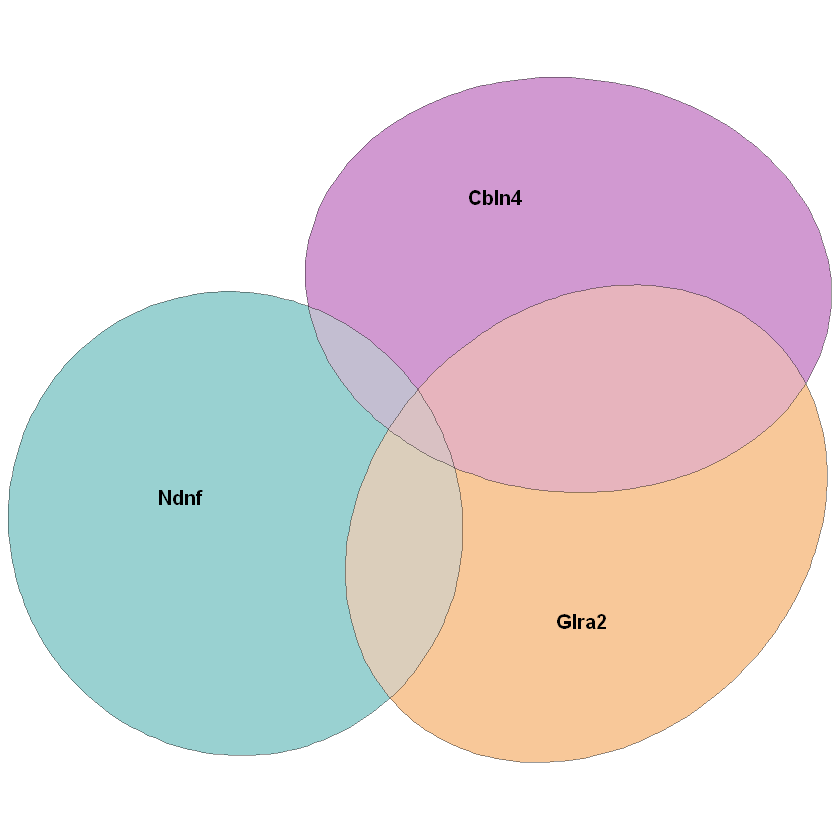

In [22]:
#Making Euler plots, 3 genes.
#Subsetting cells from all mice
#Uses functions 'euler_cells' and 'euler_values' defined above.
#One cannon gene (with optional cannon OR gene) and three sub genes
#Set shape to 'ellipse' or 'circle'

cannon_gene <- 'Th'
cannon_OR_gene <- 'none'
sub_gene1 <- 'Ndnf'
sub_gene2 <- 'Glra2'
sub_gene3 <- 'Cbln4'
color1 <-'darkcyan'
color2 <-'darkorange2'
color3 <-'darkmagenta'
shape <- 'ellipse'

filepath <- './Euler Plots/'

cell_counts<-data.frame()


for (mouse in mouseIDs) {
    mouseonly <- all_data[grep(mouse, all_data$ï..Image.File.Name), ]
    if(cannon_OR_gene=='none') {
        cannon_cells <- pos_cells(data=mouseonly, gene=cannon_gene, copynum=cpynmbrs[mouse,cannon_gene])               
        } else {
            cannon_cells <-posOR_cells(data=mouseonly, gene1=cannon_gene, gene2=cannon_OR_gene, copynum1=cpynmbrs[mouse,cannon_gene],
                                              copynum2=cpynmbrs[mouse,cannon_OR_gene])
                    }
    counts<-euler_values(cannon_cells)
    cell_counts<-rbind(cell_counts, counts)
  
}
rownames(cell_counts)<-mouseIDs
colnames(cell_counts)<-c('A','B','C','A&B','A&C','B&C','A&B&C')

totals<-colSums(cell_counts)
fit1 <- euler(totals, shape= shape)
rownames(fit1$ellipses) <- c(sub_gene1, sub_gene2, sub_gene3)

plot(fit1, alpha = 0.4,
 fill = c(toString(color1), toString(color2), toString(color3)))

#pdf(file=paste0(filepath, sub_gene1, '_', sub_gene2, '_', sub_gene3, 'euler.pdf' ))
#plot(fit1, alpha = 0.4,
#    fill = c(toString(color1), toString(color2), toString(color3)))
#dev.off()

## cumulative histograms for X and Y distribution of cells

For each section we determined the coordinates of a uniform point that we could align to

In [23]:
#read in files containing x and y coordinates of point to normalize to
x_coord <- read.xlsx('./bottom center point coordinates.xlsx', 'x_coord', row.names = 1, header= TRUE)
y_coord <- read.xlsx('./bottom center point coordinates.xlsx', 'y_coord', row.names = 1, header= TRUE)


In [24]:
# Adjust Xmin and Ymin coordinates to normalize

num_sections <- 9

x_coord_vec<-c()
y_coord_vec<-c()

for(mouse in mouseIDs) {
    mouseonly <- all_data[grep(mouse, all_data$ï..Image.File.Name), ]

    midpoints <- c()
    for(section in c(1:num_sections)) {
        seconly <- mouseonly[grep(paste0('Tilescan', section), mouseonly$ï..Image.File.Name), ]           
        x1<-rep(x_coord[mouse,section], each=nrow(seconly))
        y1<-rep(y_coord[mouse,section], each=nrow(seconly))
        x_coord_vec<-c(x_coord_vec, x1)
        y_coord_vec<-c(y_coord_vec, y1)

    }
}

xy_adj_data <- cbind(all_data, x_coord_vec, y_coord_vec)
xy_adj_data <- xy_adj_data %>%
  mutate(XMinAdj = XMin-x_coord_vec)
xy_adj_data <- xy_adj_data %>%
  mutate(YMinAdj = YMin-y_coord_vec)

In [25]:
#convert to absolute value
xy_adj_data$XMinAdj<-abs(xy_adj_data$XMinAdj)

In [26]:
# getting all cells expressing desired combinations of genes, generates a DF for each subgene
#only works with subgenes specified

cannon_gene <- 'Th'
cannon_OR_gene <- 'none'
and_gene<-'none'
not_gene1 <- 'none'
not_gene2 <- 'none'
not_gene3 <- 'none'
sub_genes <- c('Ndnf','Glra2','Cbln4')

#filepath <- './ML Histograms/'


for(genename in sub_genes){
all_sub_cells<-data.frame()

for(mouse in mouseIDs){
    mouseonly <- xy_adj_data[grep(mouse, xy_adj_data$ï..Image.File.Name), ]
   
    if(cannon_OR_gene=='none') {    
        cannon_cells <- pos_cells(data=mouseonly, gene=cannon_gene, copynum=cpynmbrs[mouse, cannon_gene])               
            } else {
                cannon_cells <-posOR_cells(data=mouseonly, gene1=cannon_gene, gene2=cannon_OR_gene, 
                                           copynum1=cpynmbrs[mouse, cannon_gene], copynum2=cpynmbrs[mouse, cannon_OR_gene])
                }
    if(and_gene!='none'){
        cannon_cells <- pos_cells(data=cannon_cells, gene=and_gene, copynum=cpynmbrs[mouse, and_gene])
    }
    if(not_gene1!='none'){
        cannon_cells <- neg_cells(data=cannon_cells, gene=not_gene1, copynum=cpynmbrs[mouse, not_gene1])
    }
    if(not_gene2!='none'){
        cannon_cells <- neg_cells(data=cannon_cells, gene=not_gene2, copynum=cpynmbrs[mouse, not_gene2])
    }
    if(not_gene3!='none'){
        cannon_cells <- neg_cells(data=cannon_cells, gene=not_gene3, copynum=cpynmbrs[mouse, not_gene3])
    }
    
            sub_cells <- pos_cells(data=cannon_cells, gene=genename, copynum=cpynmbrs[mouse, genename])

                    
    
        all_sub_cells<-rbind(all_sub_cells, sub_cells)
    }
#change this manually
    assign(paste0("Th_", genename), all_sub_cells)
    }

In [27]:
#X coord Th
p <- ggplot(Th_Ndnf, aes(x=XMinAdj)) + geom_histogram(aes(y=cumsum(after_stat(count))/dim(Th_Ndnf)[1]),fill='white', binwidth=100)+
    geom_histogram(data=Th_Glra2, aes(x=XMinAdj, y=cumsum(after_stat(count))/dim(Th_Glra2)[1]), fill="white", binwidth=100) +
    geom_histogram(data=Th_Cbln4, aes(x=XMinAdj, y=cumsum(after_stat(count))/dim(Th_Cbln4)[1]), fill="white", binwidth=100)# +
  #  xlim(c(0,4000))

In [28]:
#Extracting data from the plotted object. We're going to use this to plot the line for each group
#Ndnf
d <- ggplot_build(p)$data[[1]]
df1 <- data.frame(x = c(0, d$xmax), y = c(0, d$y))

#Glra2
d <- ggplot_build(p)$data[[2]]
df2 <- data.frame(x = c(0, d$xmax), y = c(0, d$y))

#Cbln4
d <- ggplot_build(p)$data[[3]]
df3 <- data.frame(x = c(0, d$xmax), y = c(0, d$y))


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


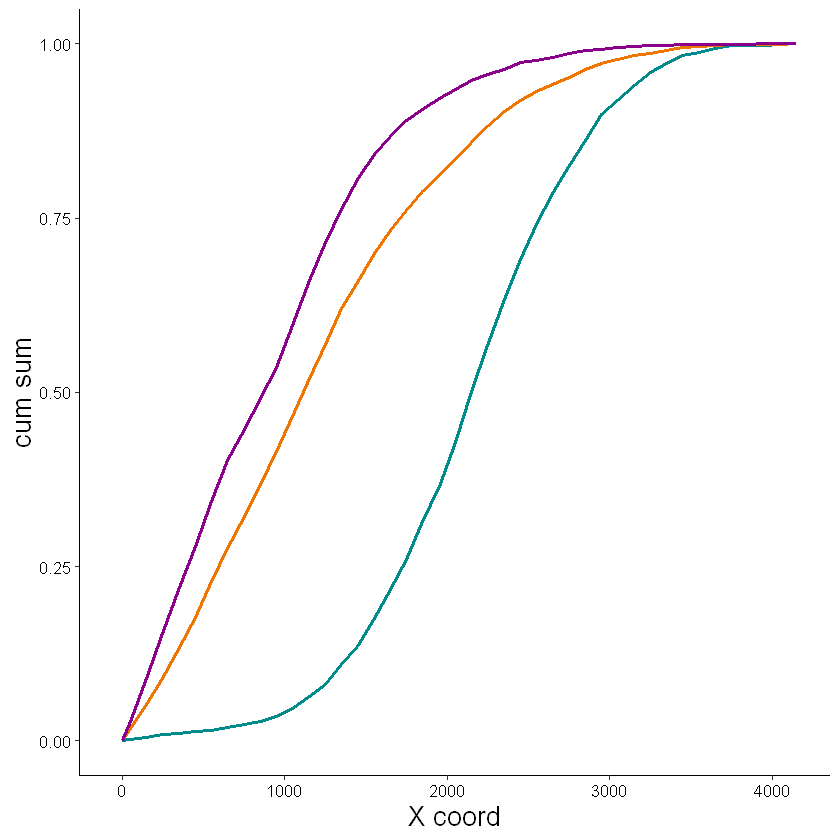

In [29]:
#This time, geom_line is used for each group
p2<- p + geom_line(data = df1, aes(x = x, y = y), color = "darkcyan", size = 1) +
    geom_line(data = df2, aes(x = x, y = y), color = "darkorange2", size = 1) +
   geom_line(data = df3, aes(x = x, y = y), color = "darkmagenta", size = 1) +

        theme_classic() +
        theme(axis.title.y=element_text(size=16,colour = "black"),
          axis.title.x=element_text(size=16,colour = "black"),
          axis.text.y=element_text(size=10,colour = "black"),
          axis.text.x=element_text(size=10, colour = "black"),
          axis.line = element_line(linewidth=0.5),
          axis.ticks = element_line(linewidth=0.5)) +
        ylab('cum sum') +
        xlab('X coord') # + xlim(c(0,6000))

p2